In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
df = pd.read_csv("general_data.csv", sep=",")

In [0]:
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [0]:
df['MonthlyIncome'].median()

49190.0

In [0]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


## удалить null:

In [0]:
df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [0]:
df.fillna(0,inplace=True)

In [0]:
#дропаем бесполезные столбцы:

df.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1, inplace = True)

# ### матрица смежности

In [0]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

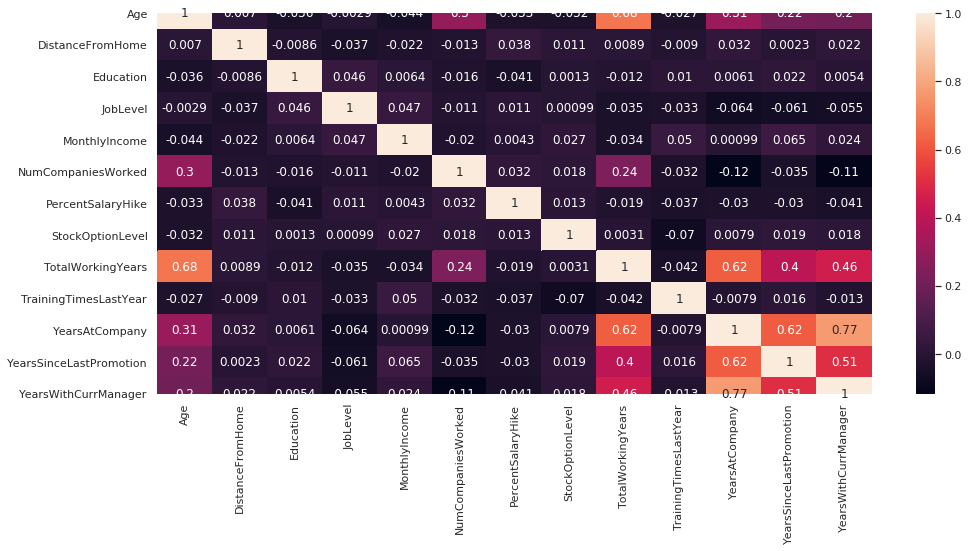

In [0]:
corr = corr_cols.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

In [0]:
print(len(df))
print(len(df[df['Attrition']=='Yes']))
print(len(df[df['Attrition']=='No']))
print("percentage of yes Attrition is:",(len(df[df['Attrition']=='Yes'])/len(df))*100,"%")
print("percentage of no Attrition is:",(len(df[df['Attrition']=='No'])/len(df))*100,"%")

4410
711
3699
percentage of yes Attrition is: 16.122448979591837 %
percentage of no Attrition is: 83.87755102040816 %


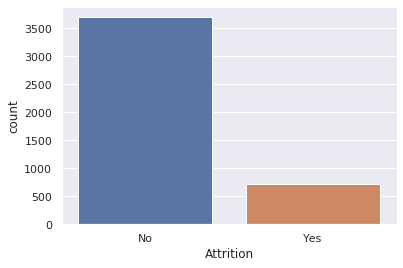

In [0]:
sns.countplot(x = "Attrition",data=df)
plt.show()

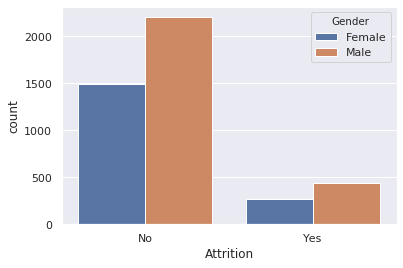

In [0]:
sns.countplot(x = "Attrition",data=df,hue="Gender")
plt.show()

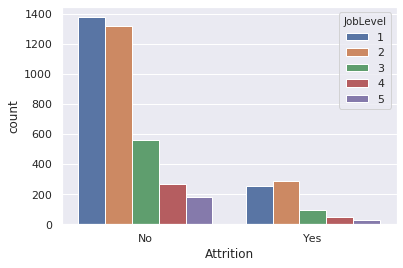

In [0]:
sns.countplot(x = "Attrition",data=df,hue="JobLevel")
plt.show()

In [0]:
#Сгруппировал по возрасту - так как слишком много значений для графика
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(df); 

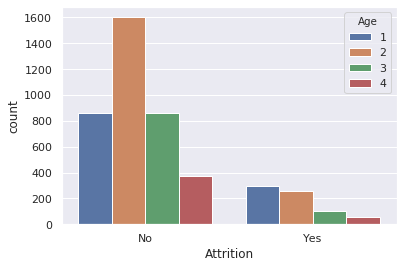

In [0]:
sns.countplot(x = "Attrition",data=df,hue="Age")
plt.show()

### Качеств в колич 

In [0]:
print(df['BusinessTravel'].unique())
print(df['Department'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())
print(df['Over18'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['Y']


In [0]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['BusinessTravel'] = labelEncoder_X.fit_transform(df['BusinessTravel'])
df['Department'] = labelEncoder_X.fit_transform(df['Department'])
df['EducationField'] = labelEncoder_X.fit_transform(df['EducationField'])
df['Gender'] = labelEncoder_X.fit_transform(df['Gender'])
df['JobRole'] = labelEncoder_X.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelEncoder_X.fit_transform(df['MaritalStatus'])
df['Over18'] = labelEncoder_X.fit_transform(df['Over18'])

In [0]:
#Выгорание в буль
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
df['Attrition']=label_encoder_y.fit_transform(df['Attrition'])

In [0]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,0,2,2,6,2,1,0,1,0,1,131160,1.0,0,11,0,1.0,6,1,0,0
1,2,1,1,1,10,1,1,0,1,6,2,41890,0.0,0,23,1,6.0,3,5,1,4
2,2,0,1,1,17,4,4,1,4,7,1,193280,1.0,0,15,3,5.0,2,5,0,3
3,2,0,0,1,2,5,1,1,3,1,1,83210,3.0,0,11,3,13.0,5,8,7,5
4,2,0,2,1,10,1,3,1,1,7,2,23420,4.0,0,12,2,9.0,2,6,0,4


In [0]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

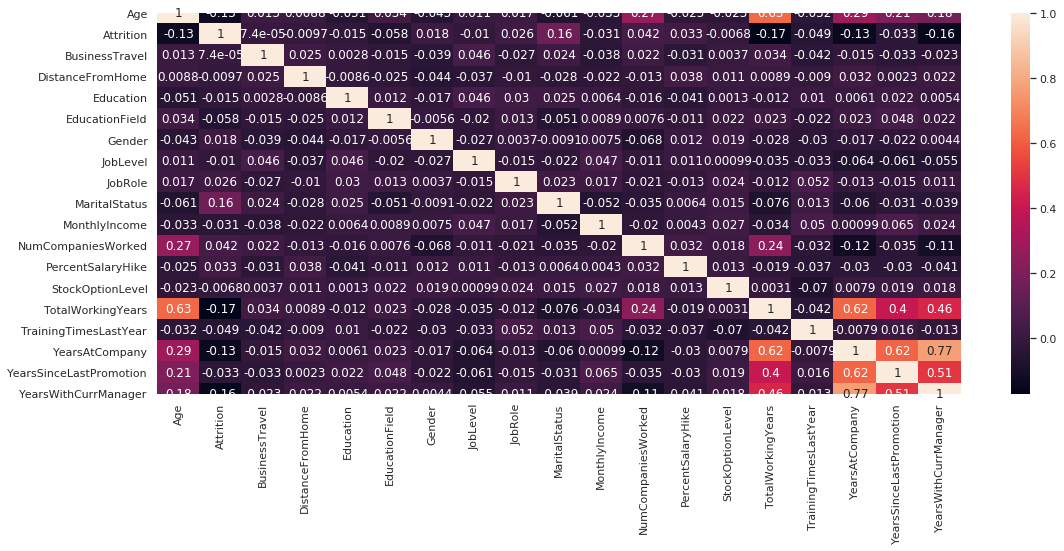

In [0]:
corr = corr_cols.corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr, annot = True)
plt.show()

# Сплит - 20%

### Можно потом добавить standart scaler - но тогда скейлить и дату из формы

In [0]:
y = df['Attrition']
x = df.drop('Attrition', axis = 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

# Logistic Regression:

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))



0.8401360544217688
[[741   0]
 [141   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
list(df.columns.values)

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'Over18',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [0]:
import pickle
pickle.dump(lr, open("model_noscaler.pkl","wb"))

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       741
           1       0.00      0.00      0.00       141

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.71      0.84      0.77       882



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
import xgboost

In [0]:
xgb = xgboost.XGBClassifier(max_depth=5, learning_rate=0.5, n_estimators=1000)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9897959183673469
[[738   3]
 [  6 135]]


In [0]:
import pickle
pickle.dump(xgb, open("model_xgb.pkl","wb"))